In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
#import tyssue
import sys
#sys.path.append('/home/guillaume/Python/tyssue/src')
import pandas as pd
import numpy as np
import json
import matplotlib.pylab as plt
%matplotlib inline
from scipy import optimize

from tyssue.core.sheet import Sheet

from tyssue.utils.utils import set_data_columns

from tyssue.geometry.sheet_geometry import SheetGeometry as geom
from tyssue.dynamics.sheet_vertex_model import SheetModel as model
import tyssue.solvers.sheet_vertex_solver as solver
from tyssue.config.json_parser import load_default
import tyssue.dynamics.sheet_isotropic_model as iso

from tyssue.dynamics.sheet_isotropic_model import isotropic_relax



from tyssue.draw.mpl_draw import sheet_view
import tyssue.draw.mpl_draw as draw
from tyssue.io import hdf5

In [3]:
h5store = 'small_hexagonal.hf5'
datasets = hdf5.load_datasets(h5store, data_names=['face', 'jv', 'je'])
sheet = Sheet('emin', datasets)




### Datasets are made of dataframes 

They are manipulated as such.

```python
hdf5.save_datasets('small_hexagonal.hf5', sheet)

sheet.je_df.head()
sheet.face_df.describe()
```

### Dataset Specifications

All the parameters are stored in **specifications**, which are nested dictionnaries.

for example:



In [4]:
sheet.set_geom('sheet')

geom.update_all(sheet)
sheet.je_df.describe()

,dy,dx,dz,length,old_jv0,old_jv1,old_cell,nx,ny,nz,sub_area,line_tension,srce,face,trgt,sub_vol
count,2.720000e+02,2.720000e+02,2.720000e+02,272.000000,272.000000,272.000000,272.000000,272.000000,2.720000e+02,2.720000e+02,2.720000e+02,272.00,272.000000,272.000000,272.000000,2.720000e+02
mean,-1.632681e-18,6.530724e-18,3.265362e-18,2.193593,99.602941,107.352941,27.500000,0.000000,-2.089832e-16,-1.449004e-17,1.886507e+00,0.12,47.477941,27.500000,47.477941,1.611139e+00
std,1.127248e+00,1.127248e+00,1.512698e+00,0.004829,27.179947,27.721741,16.156522,2.761013,2.761013e+00,3.891336e-01,5.266971e-01,0.00,27.725318,16.156522,27.725318,4.498167e-01
min,-1.857558e+00,-1.857558e+00,-2.201060e+00,2.190482,56.000000,57.000000,0.000000,-4.088597,-4.088597e+00,-6.863514e-01,2.775558e-17,0.12,0.000000,0.000000,0.000000,2.370418e-17
25%,-1.052222e+00,-1.052222e+00,-1.100530e+00,2.190482,75.000000,84.750000,13.750000,-2.507695,-2.507695e+00,-4.575676e-01,2.048787e+00,0.12,23.750000,13.750000,23.750000,1.749732e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,2.190482,99.000000,108.500000,27.500000,0.000000,-1.665335e-16,0.000000e+00,2.074847e+00,0.12,47.500000,27.500000,47.500000,1.771988e+00
75%,1.052222e+00,1.052222e+00,1.100530e+00,2.201060,123.000000,132.250000,41.250000,2.507695,2.507695e+00,4.575676e-01,2.074847e+00,0.12,71.250000,41.250000,71.250000,1.771988e+00
max,1.857558e+00,1.857558e+00,2.201060e+00,2.201060,150.000000,151.000000,55.000000,4.088597,4.088597e+00,6.863514e-01,2.074847e+00,0.12,95.000000,55.000000,95.000000,1.771988e+00


we define the adimentional contractility $\bar\Gamma = \Gamma/K_vA_0h_0^2$ and line tension
$\bar\Lambda = \Lambda /K_v (A_0^{3/2}h_0^2)$, where $h_0$ is such that $V_0 = A_0h_0$.


In [5]:

nondim_specs = load_default('dynamics', 'sheet')
dim_model_specs = model.dimentionalize(nondim_specs)

sheet.set_model('sheet', dim_model_specs)
sheet.grad_norm_factor = sheet.specs['settings']['grad_norm_factor']
sheet.nrj_norm_factor = sheet.specs['settings']['nrj_norm_factor']

isotropic_relax(sheet, nondim_specs)

multiple roots


In [6]:
sheet.specs

{'face': {'area': 0.0,
  'contractility': 96.0,
  'is_alive': True,
  'num_sides': 6,
  'perimeter': 0.0,
  'prefered_area': 24.0,
  'prefered_height': 10.0,
  'prefered_vol': 240.0,
  'vol_elasticity': 1.0,
  'x': 0.0,
  'y': 0.0,
  'z': 0.0},
 'je': {'dx': 0.0,
  'dy': 0.0,
  'dz': 0.0,
  'face': 0,
  'length': 0.0,
  'line_tension': 1410.9060918431107,
  'nx': 0.0,
  'ny': 0.0,
  'nz': 1.0,
  'srce': 0,
  'trgt': 0},
 'jv': {'basal_shift': 4.0,
  'is_active': True,
  'radial_tension': 0.0,
  'rho': 0.0,
  'x': 0.0,
  'y': 0.0,
  'z': 0.0},
 'settings': {'geometry': 'cylindrical',
  'grad_norm_factor': 11757.550765359256,
  'height_axis': 'z',
  'nrj_norm_factor': 57600.0}}

In [7]:
sheet.nrj_norm_factor

57600.0

https://en.wikipedia.org/w/index.php?title=Vector_calculus_identities&section=13#Vector_dot_product

In [8]:
Et, Ec, Ev = model.compute_energy(sheet, full_output=True)

In [9]:
sheet.je_df.head(10)

,dy,dx,dz,length,old_jv0,old_jv1,old_cell,nx,ny,nz,sub_area,line_tension,srce,face,trgt,sub_vol
je,,,,,,,,,,,,,,,,
0,-2.291472e+00,0.455802,-1.357607,2.702165,56,57,0,2.874114e+00,1.190497e+00,-1.044458e+00,1.640785e+00,1410.906092,1,0,0,1.454708e+01
1,-1.942616e+00,1.298014,1.357607,2.702165,57,58,0,-1.554312e-15,-1.221245e-15,0.000000e+00,9.883479e-16,1410.906092,2,0,1,8.762621e-15
2,2.291472e+00,-0.455802,1.357607,2.702165,56,57,1,6.221837e+00,8.250668e-01,6.963050e-01,3.157405e+00,1410.906092,0,1,1,2.799332e+01
3,2.291472e+00,0.455802,-1.357607,2.702165,56,59,1,6.221837e+00,-8.250668e-01,6.963050e-01,3.157405e+00,1410.906092,3,1,0,2.799332e+01
4,0.000000e+00,0.000000,2.715214,2.715214,57,62,1,6.221837e+00,4.125334e-01,-0.000000e+00,3.117749e+00,1410.906092,1,1,6,2.764173e+01
5,0.000000e+00,0.000000,-2.715214,2.715214,59,60,1,6.221837e+00,-4.125334e-01,0.000000e+00,3.117749e+00,1410.906092,4,1,3,2.764173e+01
6,-2.291472e+00,-0.455802,-1.357607,2.702165,60,61,1,6.221837e+00,-8.250668e-01,-6.963050e-01,3.157405e+00,1410.906092,5,1,4,2.799332e+01
7,-2.291472e+00,0.455802,1.357607,2.702165,61,62,1,6.221837e+00,8.250668e-01,-6.963050e-01,3.157405e+00,1410.906092,6,1,5,2.799332e+01
8,2.291472e+00,-0.455802,-1.357607,2.702165,61,62,2,6.063967e+00,1.618731e+00,6.963050e-01,3.157405e+00,1410.906092,5,2,6,2.799332e+01


In [10]:
sheet.face_df.head()

,perimeter,z,x,is_alive,area,y,old_idx,basal_shift,height,vol,vol_elasticity,prefered_height,contractility,prefered_area,num_sides,prefered_vol
face,,,,,,,,,,,,,,,,
0,5.404330,-1.018205e+01,4.883095,0,1.640785,3.262780e+00,0,-3.246161,0.760764,14.547082,1,10,96,24,2,240
1,16.239088,-8.145643e+00,5.684036,1,18.865118,7.401487e-16,1,-3.246161,0.607705,167.256759,1,10,96,24,6,240
2,16.239088,-4.072821e+00,5.251365,1,18.865118,2.175186e+00,2,-3.246161,0.607705,167.256759,1,10,96,24,6,240
3,16.239088,-3.700743e-17,5.684036,1,18.865118,7.401487e-16,3,-3.246161,0.607705,167.256759,1,10,96,24,6,240
4,16.239088,4.072821e+00,5.251365,1,18.865118,2.175186e+00,4,-3.246161,0.607705,167.256759,1,10,96,24,6,240


In [11]:
sheet.jv_df.is_active = 1

In [12]:
%pdb

Automatic pdb calling has been turned ON


multiple roots
0.886592687387 0.897959183673


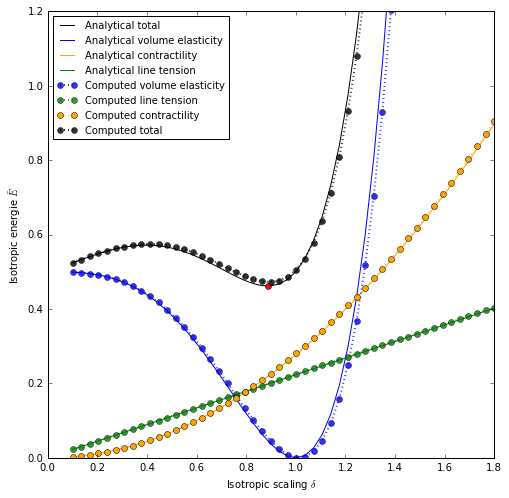

In [13]:
from tyssue.draw.mpl_draw import plot_analytical_to_numeric_comp

fig, ax = plot_analytical_to_numeric_comp(sheet, model, geom, iso, nondim_specs)


In [14]:
model.compute_energy(sheet) / sheet.face_df.is_alive.sum()

0.46457789908092373

multiple roots


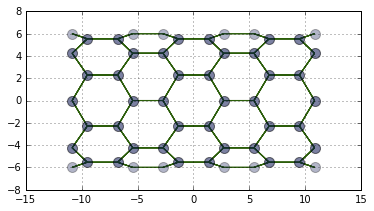

In [15]:
isotropic_relax(sheet, nondim_specs)

fig, ax = sheet_view(sheet, ['z', 'x'])

In [16]:
sheet.face_df.describe()

,perimeter,z,x,is_alive,area,y,old_idx,basal_shift,height,vol,vol_elasticity,prefered_height,contractility,prefered_area,num_sides,prefered_vol,basal_height
count,56.000000,5.600000e+01,5.600000e+01,56.000000,56.000000,5.600000e+01,56.000000,5.600000e+01,56.000000,56.000000,56,56,56,56,56.000000,56,5.600000e+01
mean,13.143443,-5.722935e-16,-1.570173e-15,0.714286,13.943880,5.075305e-16,27.500000,-3.246161e+00,0.651436,123.625422,1,10,96,24,4.857143,240,-3.246161e+00
std,4.938941,7.368011e+00,4.094538e+00,0.455842,7.851580,4.094538e+00,16.309506,4.481082e-16,0.069771,69.611531,0,0,0,0,1.823369,0,4.481082e-16
min,5.404330,-1.018205e+01,-5.760003e+00,0.000000,1.640785,-5.760003e+00,0.000000,-3.246161e+00,0.607705,14.547082,1,10,96,24,2.000000,240,-3.246161e+00
25%,5.404330,-8.145643e+00,-4.019221e+00,0.000000,1.640785,-4.019221e+00,13.750000,-3.246161e+00,0.607705,14.547082,1,10,96,24,2.000000,240,-3.246161e+00
50%,16.239088,-2.035409e-16,-1.924387e-15,1.000000,18.865118,1.480297e-15,27.500000,-3.246161e+00,0.607705,167.256759,1,10,96,24,6.000000,240,-3.246161e+00
75%,16.239088,8.145643e+00,4.019221e+00,1.000000,18.865118,4.019221e+00,41.250000,-3.246161e+00,0.760764,167.256759,1,10,96,24,6.000000,240,-3.246161e+00
max,16.239088,1.018205e+01,5.760003e+00,1.000000,18.865118,5.760003e+00,55.000000,-3.246161e+00,0.760764,167.256759,1,10,96,24,6.000000,240,-3.246161e+00


In [17]:
sheet.je_df.head()

,dy,dx,dz,length,old_jv0,old_jv1,old_cell,nx,ny,nz,sub_area,line_tension,srce,face,trgt,sub_vol
je,,,,,,,,,,,,,,,,
0,-2.291472,0.455802,-1.357607,2.702165,56,57,0,2.874114e+00,1.190497e+00,-1.044458,1.640785e+00,1410.906092,1,0,0,1.454708e+01
1,-1.942616,1.298014,1.357607,2.702165,57,58,0,-1.776357e-15,-1.110223e-15,0.000000,1.047382e-15,1410.906092,2,0,1,9.286015e-15
2,2.291472,-0.455802,1.357607,2.702165,56,57,1,6.221837e+00,8.250668e-01,0.696305,3.157405e+00,1410.906092,0,1,1,2.799332e+01
3,2.291472,0.455802,-1.357607,2.702165,56,59,1,6.221837e+00,-8.250668e-01,0.696305,3.157405e+00,1410.906092,3,1,0,2.799332e+01
4,0.000000,0.000000,2.715214,2.715214,57,62,1,6.221837e+00,4.125334e-01,-0.000000,3.117749e+00,1410.906092,1,1,6,2.764173e+01


In [18]:
grad_t, grad_c, grad_v_srce, grav_trgt = model.compute_gradient(sheet, components=True)


In [19]:
grad_t.head()

,x,y,z
je,,,
0,-0.000000,0.000000,0.000000
1,-0.000000,0.000000,-0.000000
2,237.992103,-1196.467099,-708.859817
3,-237.992103,-1196.467099,708.859817
4,-0.000000,-0.000000,-1410.906092


In [20]:
grad_c.head()

,x,y,z
je,,,
0,-0.000000,0.000000,0.000000
1,-0.000000,0.000000,-0.000000
2,262.964613,-1322.012386,-783.240475
3,-262.964613,-1322.012386,783.240475
4,-0.000000,-0.000000,-1558.952462


In [21]:
grad_v_srce.head()

,x,y,z
je,,,
0,-0.000000,0.000000,-0.000000
1,-0.000000,0.000000,0.000000
2,-368.357084,425.937146,734.448658
3,-97.798197,961.378295,12.802673
4,-180.568056,-523.616634,740.549070


In [22]:
grad_i = model.compute_gradient(sheet, components=False)
grad_i.head()

,x,y,z
srce,,,
0,0.004460,1.381611e-17,-0.014001
1,-0.006905,-2.860315e-03,-0.012965
2,0.003154,3.153586e-03,-0.014001
3,-0.006905,2.860315e-03,-0.012965
4,-0.002785,1.153606e-03,-0.001036


In [23]:
# geom.scale(sheet, 2, sheet.coords)
# geom.update_all(sheet)

In [24]:
bck_lt = sheet.je_df.line_tension.copy()
bck_ct = sheet.face_df.contractility.copy()
bck_ve = sheet.face_df.vol_elasticity.copy()


In [25]:
# sheet.je_df.line_tension = 0
# sheet.face_df.vol_elasticity = 0
# sheet.face_df.contractility = 0

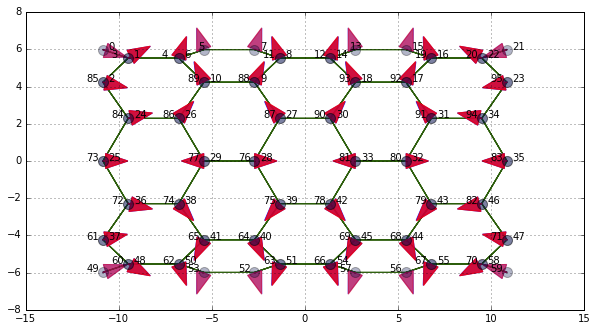

In [26]:
scale = 10
fig, ax = draw.plot_forces(sheet, geom, model, ['z', 'x'], scale)
fig.set_size_inches(10, 12)
for n, (vx, vy, vz) in sheet.jv_df[sheet.coords].iterrows():
    shift = 0.6 * np.sign(vy)
    ax.text(vz+shift-0.3, vx, str(n))

app_grad_specs = draw.get_default_draw_specs()['grad']
app_grad_specs.update({'color':'r'})
    
def draw_approx_force(ax=None):
    fig, ax = draw.plot_forces(sheet, geom, model,
                              ['z', 'x'], scaling=scale, ax=ax,
                              approx_grad=solver.approx_grad, **{'grad':app_grad_specs})
    fig.set_size_inches(10, 12)
    return fig, ax

## Uncomment bellow to recompute
fig, ax = draw_approx_force(ax=ax)
#fig

In [27]:
sheet.je_df.line_tension = bck_lt.copy()
sheet.face_df.contractility = bck_ct.copy()
sheet.face_df.vol_elasticity = bck_ve.copy()

http://scipy.github.io/devdocs/generated/scipy.optimize.check_grad.html#scipy.optimize.check_grad

In [28]:

grad_err = solver.check_grad(sheet, geom, model)
grad_err /= sheet.jv_df.size


print("Error on the gradient (non-dim, per vertex): {:.3e}".format(grad_err))


Error on the gradient (non-dim, per vertex): 1.524e-06


In [29]:
settings = {
    'minimize': {
        'options': {'disp':True,
        'gtol':1e-4},
        'jac': solver.opt_grad
        }
    }


res = solver.find_energy_min(sheet, geom, model, **settings)
print(res['success'])

True


In [30]:
res['fun']/sheet.face_df.is_alive.sum()

0.44267730179574655

In [31]:
sheet.je_df.line_tension = sheet.je_df.line_tension * (3*np.sin(sheet.je_df.nz)**2)

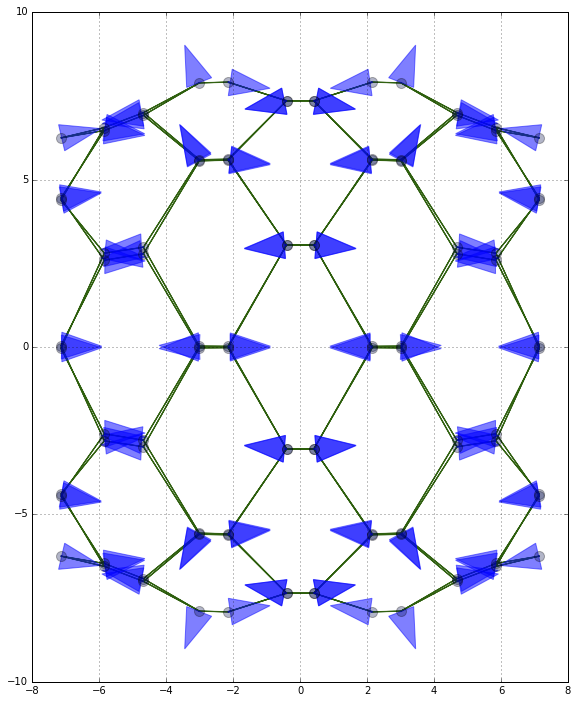

In [32]:
fig, ax = draw.plot_forces(sheet, geom, model, ['z', 'y'], 1)
fig.set_size_inches(10, 12)


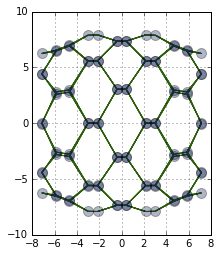

In [49]:
fig, ax = sheet_view(sheet, ['z', 'x'])